Baseline Prediction: 10794.0
Baseling Model SSE: 607396454.0
Regression Model SSE: 131819322.75993812
Difference: 475577131.2400619
Baseline R-Squared Score: -4.989003654642943e-09
Train R-Squared Score: 0.7829764685824372
Test R-Squared Score: 0.7145334995892115


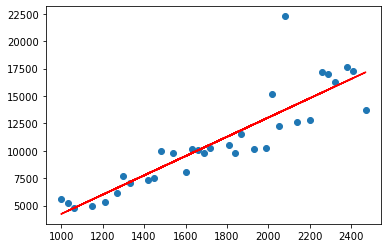

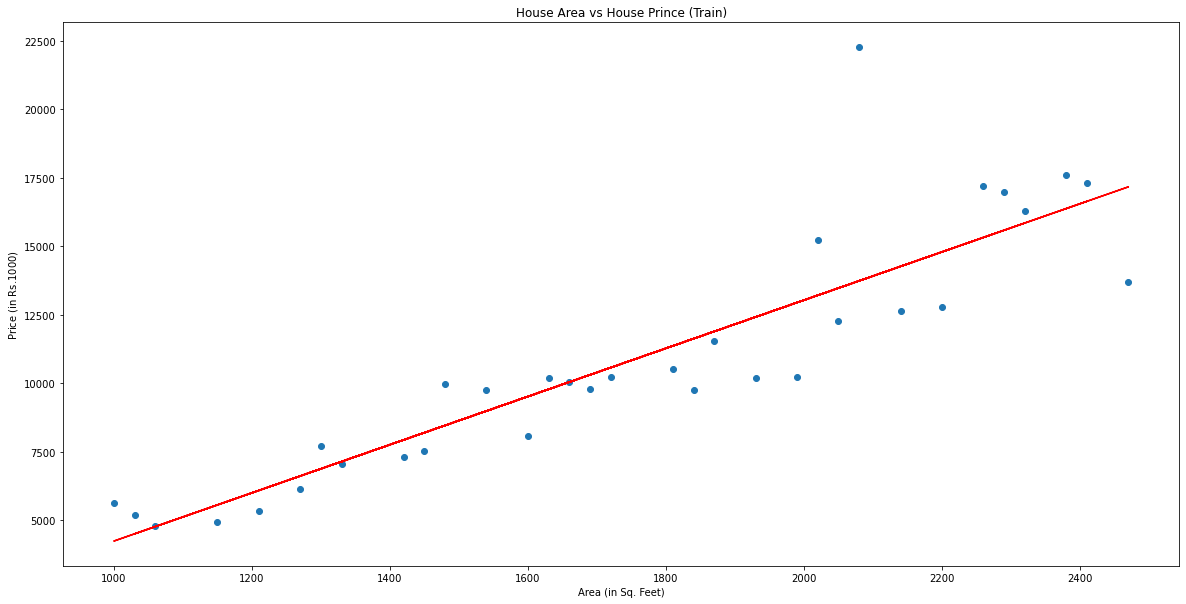

In [1]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
data = pd.read_csv("housing_prices_SLR.csv")
X = data[["AREA"]].values
data.PRICE = np.round(data.PRICE/1000)
Y = data[["PRICE"]].values
x_train, x_test, y_train, y_test = train_test_split(
X, Y, test_size=1/3, random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color='red')
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.scatter(x_train, y_train)
ax.plot(x_train, regressor.predict(x_train), color='red')
ax.set_xlabel("Area (in Sq. Feet)")
ax.set_ylabel("Price (in Rs.$1000$)")
ax.set_title("House Area vs House Prince (Train)")
baseline_pred = np.round(y_train.mean())
print('Baseline Prediction:', baseline_pred)
diff = y_train - baseline_pred
squared_diff = diff**2
sse = squared_diff.sum()
print("Baseling Model SSE:", sse)
y_train_pred = regressor.predict(x_train)
sse_train = ((y_train - y_train_pred)**2).sum()
print("Regression Model SSE:", sse_train)
print("Difference:", (sse-sse_train))
baseline_score = r2_score(y_train, [baseline_pred]*len(y_train))
model_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_pred)
print("Baseline R-Squared Score:", baseline_score)
print("Train R-Squared Score:", model_score)
print("Test R-Squared Score:", test_score)
